In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
from scipy.linalg import expm 
from scipy.linalg import logm 

from scipy.linalg import fractional_matrix_power

As = [] 

for i in range(10):
    
#     A = np.identity(2)
    A = np.random.uniform(-3, 3, size = (2,2) )
    
    As.append( np.dot(A, A.T) )
    
    
def func(X):
    
    Xp = fractional_matrix_power(X, -0.5)
    
    s = 0 
    
    for A in As: 
        
        s = s + np.linalg.norm( logm( np.dot( np.dot( Xp, A ), Xp ) ) )

    return s 

## stabilized implementation

In [10]:
eta = 0.005; 
delta = 0.1

point = np.array([ np.random.uniform( 50, 150 ) , np.random.uniform( 150, 250 ) ] )

pts = []

ds_stablized = [] 

N = 10 

Ws = [ 
    np.array([[1,0], [0,0]]), np.array([[0,1], [0,0]]), np.array([[0,0], [1,0]]), np.array([[0,0], [0,1]]),
    np.array([[-1,0], [0,0]]), np.array([[0,-1], [0,0]]), np.array([[0,0], [-1,0]]), np.array([[0,0], [0,-1]])
] 

for _ in range(5):
    
    X = np.random.uniform(10, 50, size = (2,2) )  

    X = np.dot(X, X.T) 
    
    ds_stablized_inner = []

    for i in range(500): 

        g_ = np.zeros((2,2)) 

        Xp = np.real( fractional_matrix_power(X, 1./2) )

    #     for W in Ws:
        while True:

            W = np.random.uniform(-1, 1, size = (2,2) ) # approximate a "ball", w

            l = np.linalg.norm( W )

            if (l > 0.98) & (l<1.02): # rejection sampling 
                break

        new_X1 = np.dot( np.dot( Xp, expm( delta * W ) ), Xp )
        new_X2 = np.dot( np.dot( Xp, expm( -delta * W ) ), Xp )

        d1 = func(new_X1) 
        d2 = func(new_X2) 

        g_ = ( func(new_X1) * W - func(new_X2) * W )/2. * 4 / delta 
        # one could change this above line to get the unstabilized implementation

        Xp = np.real( fractional_matrix_power(X, 1./2) )

        X = np.real( np.dot( np.dot( Xp, expm( - eta * g_ ) ), Xp ) )

        pts.append( np.real( X ) ) 
        
        ds_stablized_inner.append( func( np.real( X ) ) )
    
    ds_stablized.append( ds_stablized_inner )  

In [11]:
ds_stablized = np.array( ds_stablized ) - np.min( np.array( ds_stablized ) )
                                                            
ds_m = np.mean( np.array( ds_stablized ), axis = 0 ) 
ds_std = np.std( np.array( ds_stablized ), axis = 0 ) 

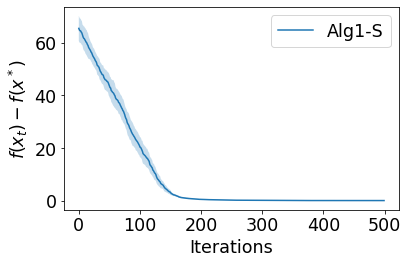

In [12]:
plt.rcParams['figure.figsize'] = 6,4
plt.rcParams['font.size'] = 17.5

l_s, = plt.plot(ds_m, label = 'Alg1-S') 
# l, = plt.plot(ds_unstabilized, label = 'Alg1') 

plt.fill_between(range(len(ds_m)), ds_m - ds_std, ds_m + ds_std, alpha = 0.25 )

# plt.xlim(-10,150)

plt.xlabel('Iterations') 



plt.ylabel('$f (x_t) - f (x^*)$')

plt.legend( handles = [l_s] ) 

plt.tight_layout() 

# plt.savefig('A100Seta0.005delta0.1.png', dpi = 150) 